# Sistema de detección de minas utilizando GPR y CNN

## Importaciones

In [ ]:
!pip install tensorflow-addons[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [ ]:
import joblib
import h5py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import layers, callbacks, utils

## Funciones

### Lectura de C-scans

In [ ]:
def read_c_scan(filename: str, polarization: str):
    data_frame = h5py.File(filename, 'r')

    t0 = data_frame['Time'].attrs['t0']
    tf = data_frame['Time'].attrs['tf']
    qt = int(data_frame['Time'].attrs['q'])
    # x- and y-axis lower limits, upper limits and step are retrieved
    x0 = data_frame['Position'].attrs['x0']
    dx = data_frame['Position'].attrs['dx']
    xf = data_frame['Position'].attrs['xf']
    y0 = data_frame['Position'].attrs['y0']
    dy = data_frame['Position'].attrs['dy']
    yf = data_frame['Position'].attrs['yf']
    print(f"x: ({x0}, {xf})")
    print(f"y: ({y0}, {yf})")
    # Amount of steps over each axis is calculated. Operation rounds up the division result as needed
    qx = int(round((xf - x0) / dx + 1))
    qy = int(round((yf - y0) / dy + 1))

    c_scan_scalars = np.zeros([qx, qy, qt])

    for i in range(0, qx):
        # Indexes used to retrieve individual planes of the C-Scan are calculated
        index_0 = i * qy
        index_f = (i + 1) * qy
        c_scan_scalars[i, :, :] = data_frame['A-Scan/Re{A-Scan x-pol}'][index_0:index_f][:]

    return c_scan_scalars

### Graficar mapa de minas

In [ ]:
def plot_mine_map(x, y, map):
    plt.figure(figsize=(10, 10))
    plt.grid(False)
    plt.pcolor(x, y, np.swapaxes(map, 0, 1), cmap='YlGnBu')
    plt.colorbar()
    plt.clim(0,1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

## Escenarios 

### Escenario 1

x: (0.0, 0.7)
y: (0.0, 0.7)


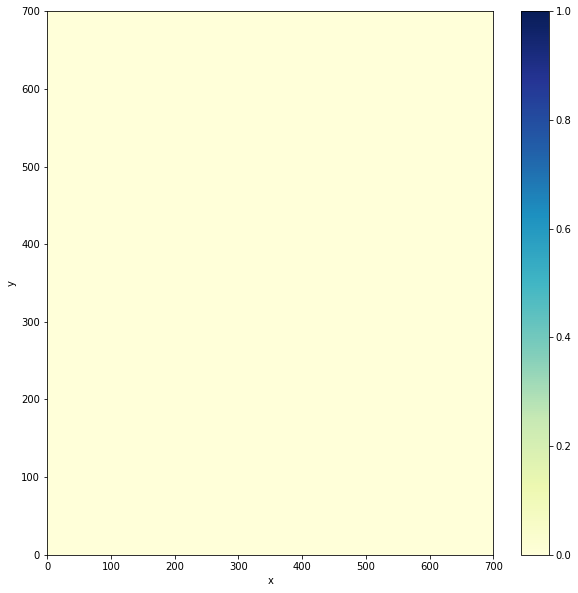

In [ ]:
c_scan = read_c_scan("C_Scan_time_raw_1.h5", 'x')
qx, qy, qt = c_scan.shape
X_1 = np.reshape(c_scan, (qx * qy, qt))

x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)

mine_map = np.zeros((qx, qy))
y_1 = np.reshape(mine_map, (qx * qy))

plot_mine_map(x, y, mine_map)

### Escenario 2

x: (0.0, 0.7)
y: (0.0, 0.7)


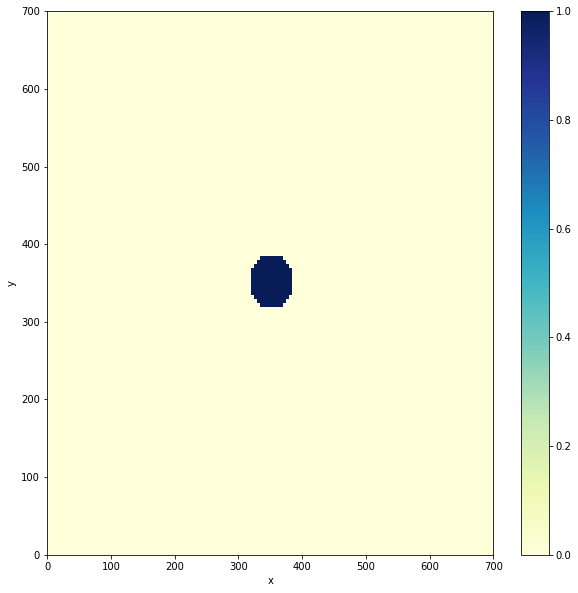

In [ ]:
c_scan = read_c_scan("C_Scan_time_raw_2.h5", 'x')

qx, qy, qt = c_scan.shape
X_2 = np.reshape(c_scan, (qx * qy, qt))

x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)

mine_map = np.zeros((x.size, y.size))

cx = 350
cy = 350
r = 35

mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis, :]-cy)**2 < r**2
mine_map[mask] = 1

y_2 = np.reshape(mine_map, (qx * qy))

plot_mine_map(x, y, mine_map)


### Escenario 3

x: (0.0, 0.7)
y: (0.0, 0.7)


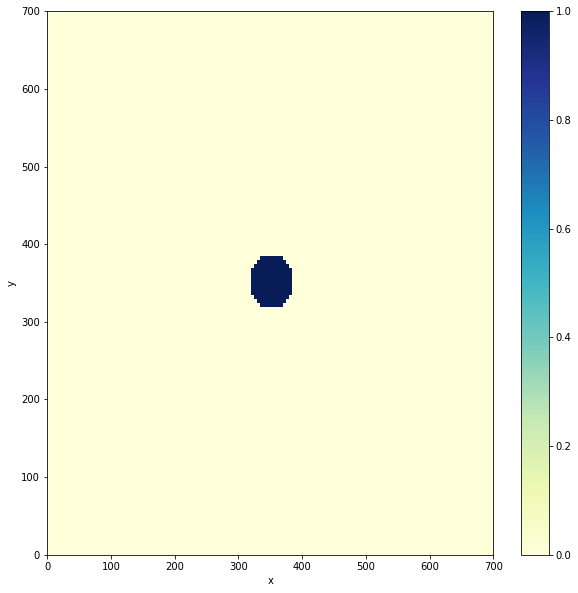

In [ ]:
c_scan = read_c_scan("C_Scan_time_raw_3.h5", "x")
qx, qy, qt = c_scan.shape
X_3 = np.reshape(c_scan, (qx * qy, qt))

x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)

mine_map = np.zeros((x.size, y.size))

cx = 350
cy = 350
r = 35

mask = (x[:, np.newaxis]-cx)**2 + (y[np.newaxis, :]-cy)**2 < r**2
mine_map[mask] = 1

y_3 = np.reshape(mine_map, (qx * qy))

plot_mine_map(x, y, mine_map)

### Escenario 4

x: (0.0, 0.7)
y: (1.0, 1.7)


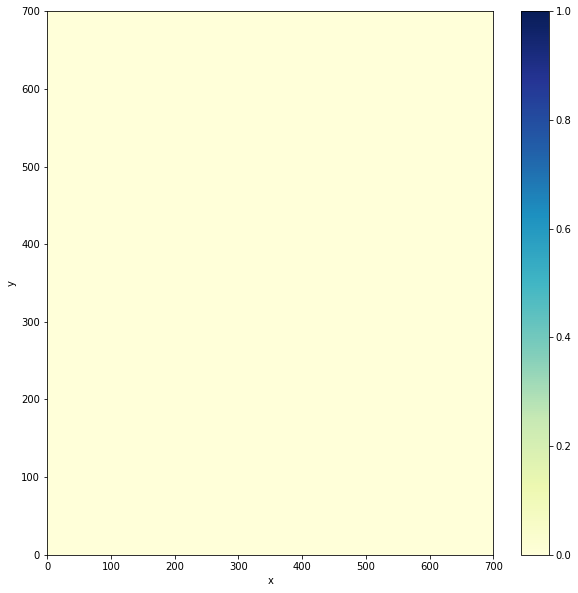

In [ ]:
c_scan = read_c_scan("C_Scan_time_raw_4.h5", 'x')
qx, qy, qt = c_scan.shape
X_4 = np.reshape(c_scan, (qx * qy, qt))

x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)

mine_map = np.zeros((x.size, y.size))

y_4 = np.reshape(mine_map, (qx * qy))
plot_mine_map(x, y, mine_map)

### Escenario 5

x: (0.0, 0.7)
y: (0.0, 0.7)


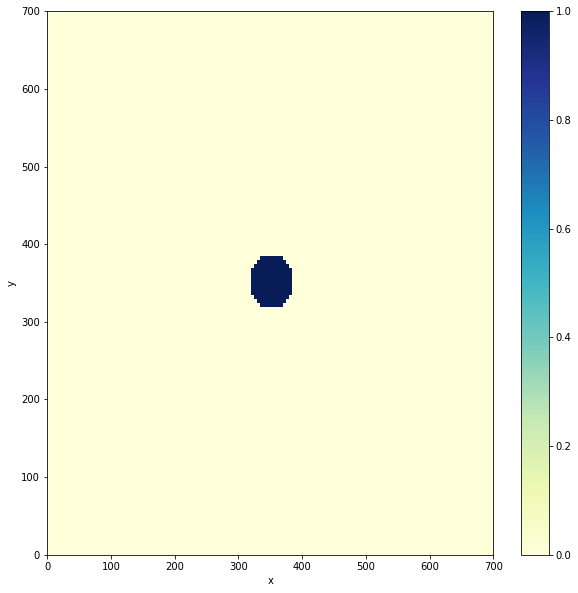

In [ ]:
c_scan = read_c_scan("C_Scan_time_raw_5.h5", 'x')

qx, qy, qt = c_scan.shape
X_5 = np.reshape(c_scan, (qx * qy, qt))

x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)

mine_map = np.zeros((x.size, y.size))

cx = 350
cy = 350
r = 35

mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis, :]-cy)**2 < r**2
mine_map[mask] = 1

y_5 = np.reshape(mine_map, (qx * qy))

plot_mine_map(x, y, mine_map)

### Escenario 6

x: (0.0, 0.7)
y: (1.0, 1.7)


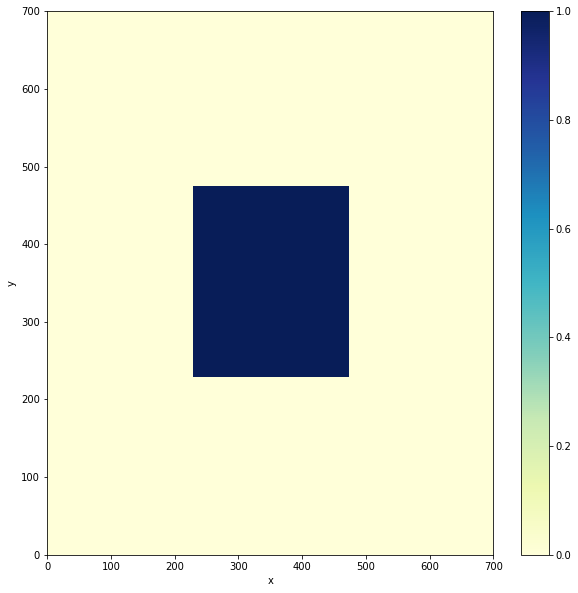

In [ ]:
c_scan = read_c_scan("C_Scan_time_raw_6.h5", 'x')

qx, qy, qt = c_scan.shape
X_6 = np.reshape(c_scan, (qx * qy, qt))

x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)

mine_map = np.zeros((x.size, y.size))

cx = 350
cy = 350
l = 250

mask_x= np.abs(x-cx) < l/2.
mask_y= np.abs(y-cy) < l/2

mine_map[np.ix_(np.flatnonzero(mask_x), np.flatnonzero(mask_y))] = 1

y_6 = np.reshape(mine_map, (qx * qy))

plot_mine_map(x, y, mine_map)

### Escenario 7

x: (0.0, 0.7)
y: (0.0, 0.7)


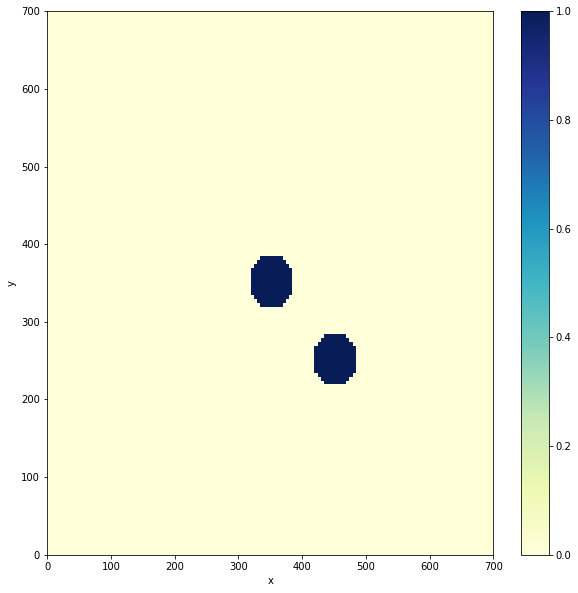

In [ ]:
c_scan = read_c_scan("C_Scan_time_raw_7.h5", 'x')

qx, qy, qt = c_scan.shape
X_7 = np.reshape(c_scan, (qx * qy, qt))

x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)

mine_map = np.zeros((x.size, y.size))

cx, cy, r = 350, 350, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis, :]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, r = 450, 250, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis, :]-cy)**2 < r**2
mine_map[mask] = 1

y_7 = np.reshape(mine_map, (qx * qy))

plot_mine_map(x, y, mine_map)

### Escenario 8

x: (0.0, 0.7)
y: (1.0, 1.7)


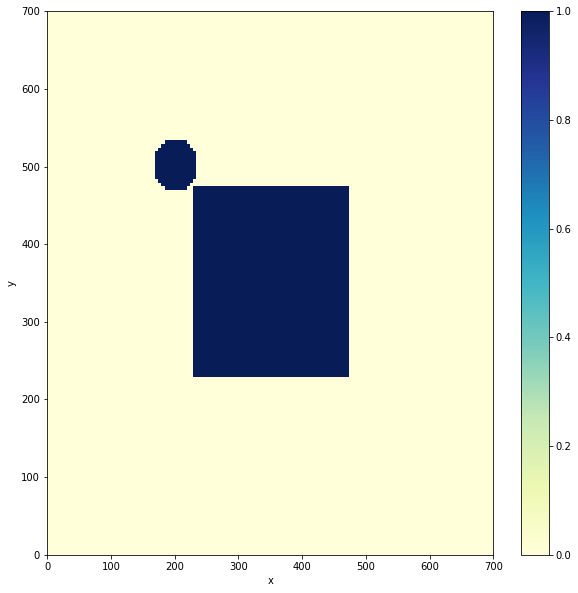

In [ ]:
c_scan = read_c_scan("C_Scan_time_raw_8.h5" ,"x")
qx, qy, qt = c_scan.shape
X_8 = np.reshape(c_scan, (qx * qy, qt))

x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
mine_map = np.zeros((x.size, y.size))

cx, cy, r = 200, 500, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis, :]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, l = 350, 350, 250
mask_x= np.abs(x-cx) < l/2
mask_y= np.abs(y-cy) < l/2

mine_map[np.ix_(np.flatnonzero(mask_x), np.flatnonzero(mask_y))] = 1

y_8 = np.reshape(mine_map, (qx * qy))

plot_mine_map(x, y, mine_map)

## Escenarios - Nuevos

### Escenario - Solo arena

x: (0.0, 0.7)
y: (0.7, 1.4)


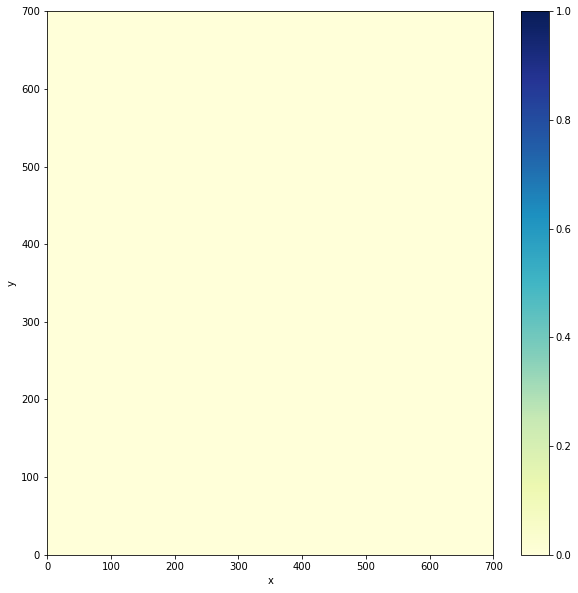

In [ ]:
c_scan = read_c_scan("C_scan_default_title_0_34_new.h5", 'x')
c_scan_0_new = c_scan 
c_scan_avg = np.mean(c_scan, axis=(0, 1))
qx, qy, qt = c_scan.shape
X_0_new = np.reshape(c_scan-c_scan_avg, (qx * qy, qt))


x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)

mine_map = np.zeros((qx, qy))
y_0_new = np.reshape(mine_map, (qx * qy))

plot_mine_map(x, y, mine_map)


x: (0.0, 0.7)
y: (0.7, 1.4)


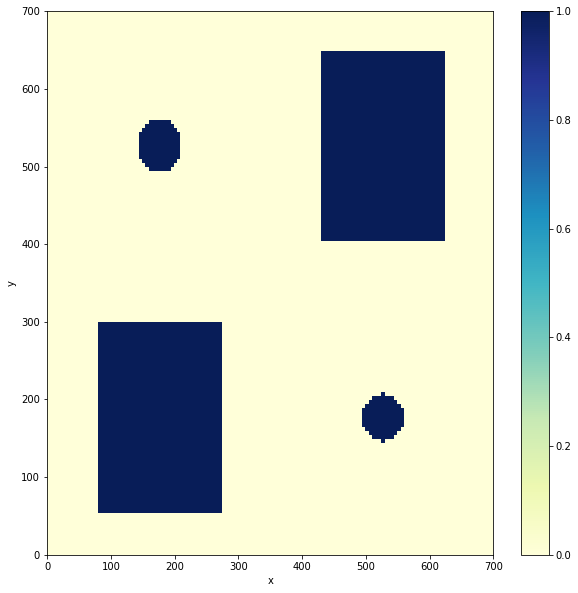

In [ ]:
c_scan = read_c_scan("C_scan_default_title_1_new.h5", 'x')
c_scan_1_new = c_scan 
c_scan_avg = np.mean(c_scan, axis=(0, 1))
qx, qy, qt = c_scan.shape
X_1_new = np.reshape(c_scan-c_scan_avg, (qx * qy, qt))


x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)

mine_map = np.zeros((qx, qy))

cx, cy, r = 175, 525, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, a, b = 525, 175, 66.3/2, 60.20/2
mask = (x[:,np.newaxis]-cx)**2/a**2 + (y[np.newaxis,:]-cy)**2/b**2 < 1
mine_map[mask] = 1

cx, cy, lx, ly = 175, 175, 200, 250
mask_x= np.abs(x-cx) < lx/2
mask_y= np.abs(y-cy) < ly/2
mine_map[np.ix_(np.flatnonzero(mask_x), np.flatnonzero(mask_y))] = 1

cx, cy, lx, ly = 525, 525, 200, 250
mask_x= np.abs(x-cx) < lx/2
mask_y= np.abs(y-cy) < ly/2
mine_map[np.ix_(np.flatnonzero(mask_x), np.flatnonzero(mask_y))] = 1

y_1_new = np.reshape(mine_map, (qx * qy))

plot_mine_map(x, y, mine_map)

x: (0.0, 0.7)
y: (0.7, 1.4)


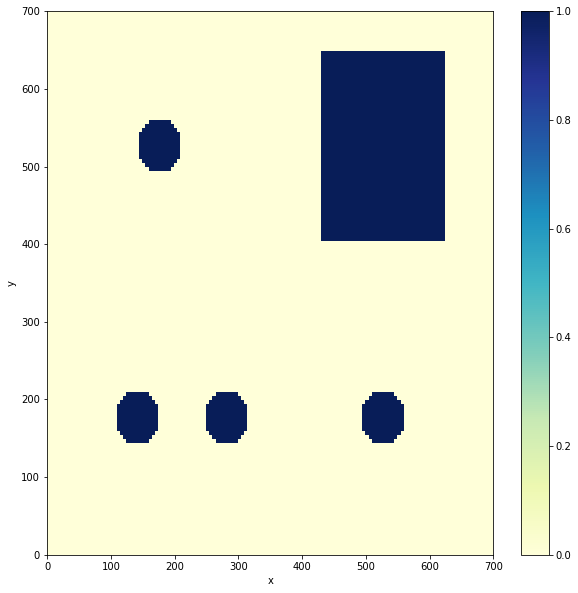

In [ ]:
c_scan = read_c_scan("C_scan_default_title_2_new.h5", 'x')
c_scan_2_new = c_scan 
c_scan_avg = np.mean(c_scan, axis=(0, 1))
qx, qy, qt = c_scan.shape
X_2_new = np.reshape(c_scan-c_scan_avg, (qx * qy, qt))


x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)

mine_map = np.zeros((qx, qy))

cx, cy, r = 175, 525, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, r = 525, 175, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, r = 140, 175, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, r = 140*2, 175, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, lx, ly = 525, 525, 200, 250
mask_x= np.abs(x-cx) < lx/2
mask_y= np.abs(y-cy) < ly/2
mine_map[np.ix_(np.flatnonzero(mask_x), np.flatnonzero(mask_y))] = 1

y_2_new = np.reshape(mine_map, (qx * qy))

plot_mine_map(x, y, mine_map)

x: (0.0, 0.7)
y: (0.7, 1.4)


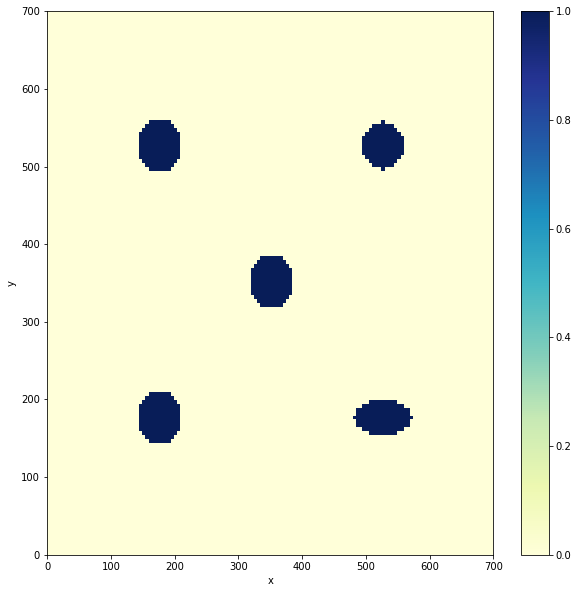

Number of A-scans with object: 687
Number of A-scans without object: 19194


In [ ]:
c_scan = read_c_scan("C_scan_default_title_3_new.h5", 'x')
c_scan_3_new = c_scan 
c_scan_avg = np.mean(c_scan, axis=(0, 1))
qx, qy, qt = c_scan.shape
X_3_new = np.reshape(c_scan-c_scan_avg, (qx * qy, qt))

mine_map = np.zeros((x.size, y.size))

cx, cy, r = 175, 525, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, a, b = 525, 525, 66.3/2, 60.20/2
mask = (x[:,np.newaxis]-cx)**2/a**2 + (y[np.newaxis,:]-cy)**2/b**2 < 1
mine_map[mask] = 1

cx, cy, r = 175, 175, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, a, b = 525, 175, 90.2/2, 46.45/2
mask = (x[:,np.newaxis]-cx)**2/a**2 + (y[np.newaxis,:]-cy)**2/b**2 < 1
mine_map[mask] = 1

cx, cy, r = 350, 350, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

y_3_new = np.reshape(mine_map, (qx * qy))

plot_mine_map(x, y, mine_map)
print(f"Number of A-scans with object: {len(mine_map[mine_map == 1])}")
print(f"Number of A-scans without object: {len(mine_map[mine_map == 0])}")

x: (0.0, 0.7)
y: (0.7, 1.4)


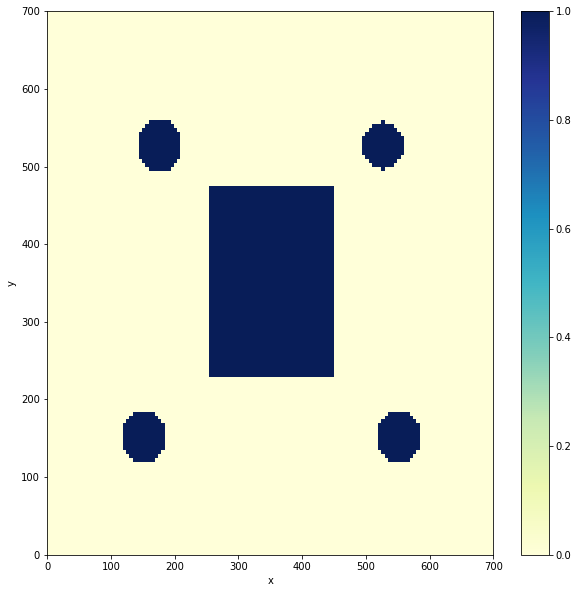

In [ ]:
c_scan = read_c_scan("C_scan_default_title_4_new.h5", 'x')
c_scan_4_new = c_scan 
c_scan_avg = np.mean(c_scan, axis=(0, 1))
qx, qy, qt = c_scan.shape
X_4_new = np.reshape(c_scan-c_scan_avg, (qx * qy, qt))

mine_map = np.zeros((x.size, y.size))

cx, cy, a, b = 525, 525, 66.3/2, 60.20/2
mask = (x[:,np.newaxis]-cx)**2/a**2 + (y[np.newaxis,:]-cy)**2/b**2 < 1
mine_map[mask] = 1

cx, cy, r = 175, 525, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, r = 550, 150, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, r = 150, 150, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, l = 350, 350, 250
mask_x= np.abs(x-cx) < 200/2
mask_y= np.abs(y-cy) < l/2
mine_map[np.ix_(np.flatnonzero(mask_x), np.flatnonzero(mask_y))] = 1

y_4_new = np.reshape(mine_map, (qx * qy))

plot_mine_map(x, y, mine_map) 

x: (0.0, 0.7)
y: (0.7, 1.4)


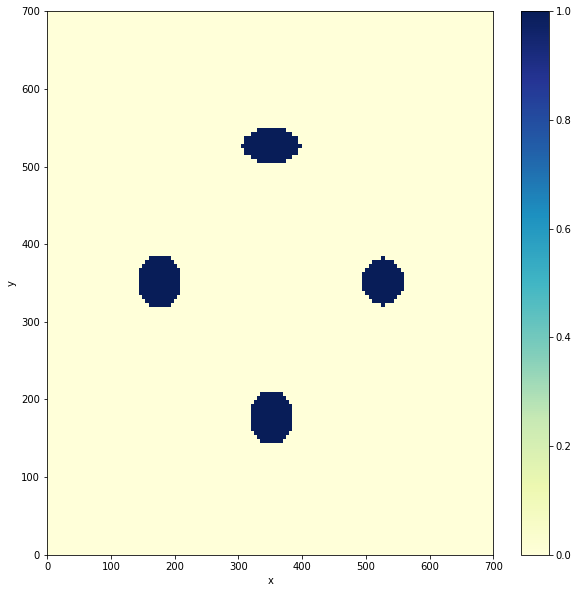

In [ ]:
c_scan = read_c_scan("C_scan_default_title_5_new.h5", 'x')
c_scan_5_new = c_scan 
c_scan_avg = np.mean(c_scan, axis=(0, 1))
qx, qy, qt = c_scan.shape
X_5_new = np.reshape(c_scan-c_scan_avg, (qx * qy, qt))

mine_map = np.zeros((x.size, y.size))

cx, cy, a, b = 350, 525, 90.2/2, 46.45/2
mask = (x[:,np.newaxis]-cx)**2/a**2 + (y[np.newaxis,:]-cy)**2/b**2 < 1
mine_map[mask] = 1

cx, cy, a, b = 525, 350, 66.3/2, 60.20/2
mask = (x[:,np.newaxis]-cx)**2/a**2 + (y[np.newaxis,:]-cy)**2/b**2 < 1
mine_map[mask] = 1

cx, cy, r = 350, 175, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, r = 175, 350, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

y_5_new = np.reshape(mine_map, (qx * qy))

plot_mine_map(x, y, mine_map)

## Entrenamiento

### Unión de Escenarios

In [ ]:
X_train = np.concatenate((X_1_new, X_2_new, X_3_new), axis=0)
y_train = np.concatenate((y_1_new, y_2_new, y_3_new), axis=0)
print(f"Número de muestras sin objeto: {y_train[y_train == 0].shape[0]}")
print(f"Número de muestras con objeto: {y_train[y_train == 1].shape[0]}")

Número de muestras sin objeto: 52377
Número de muestras con objeto: 7266


In [ ]:
X_val = np.concatenate((X_4, X_8), axis=0)
y_val = np.concatenate((y_4, y_8), axis=0)

### CNN





In [ ]:
n_time_steps = X_train.shape[1]
n_channels = 1

input_shape = (n_time_steps, n_channels)

model = tf.keras.Sequential([
  layers.Input(shape = input_shape),
  layers.Conv1D(filters = 20, kernel_size = 20, strides = 2, activation = 'relu'),
  layers.Conv1D(filters = 5, kernel_size = 10, strides = 2, activation = 'relu'),
  layers.Flatten(),
  layers.Dense(32, activation = 'relu'),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=[tf.metrics.BinaryAccuracy(), 
                       tfa.metrics.F1Score(num_classes = 1, average = 'macro', threshold = 0.5)])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 290, 20)           420       
                                                                 
 conv1d_11 (Conv1D)          (None, 141, 5)            1005      
                                                                 
 flatten_5 (Flatten)         (None, 705)               0         
                                                                 
 dense_10 (Dense)            (None, 32)                22592     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 24,050
Trainable params: 24,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n_epochs = 25
training = model.fit(X_train, 
                     y_train, 
                     epochs = n_epochs, 
                     callbacks = [callbacks.EarlyStopping(monitor='loss', patience=20)],
                     verbose=1)

Epoch 1/25
1864/1864 [==============================] - 8s 4ms/step - loss: 0.3575 - binary_accuracy: 0.8788 - f1_score: 0.0161
Epoch 2/25
1864/1864 [==============================] - 7s 4ms/step - loss: 0.2698 - binary_accuracy: 0.9119 - f1_score: 0.4759
Epoch 3/25
1864/1864 [==============================] - 7s 4ms/step - loss: 0.2221 - binary_accuracy: 0.9278 - f1_score: 0.6367
Epoch 4/25
1864/1864 [==============================] - 7s 4ms/step - loss: 0.2186 - binary_accuracy: 0.9295 - f1_score: 0.6477
Epoch 5/25
1864/1864 [==============================] - 7s 4ms/step - loss: 0.2152 - binary_accuracy: 0.9318 - f1_score: 0.6603
Epoch 6/25
1864/1864 [==============================] - 7s 4ms/step - loss: 0.2096 - binary_accuracy: 0.9352 - f1_score: 0.6802
Epoch 7/25
1864/1864 [==============================] - 7s 4ms/step - loss: 0.2044 - binary_accuracy: 0.9383 - f1_score: 0.6975
Epoch 8/25
1864/1864 [==============================] - 7s 4ms/step - loss: 0.1971 - binary_accuracy: 0.

In [ ]:
print(training.history.keys())

dict_keys(['loss', 'binary_accuracy', 'f1_score'])


Text(0, 0.5, 'Recall')

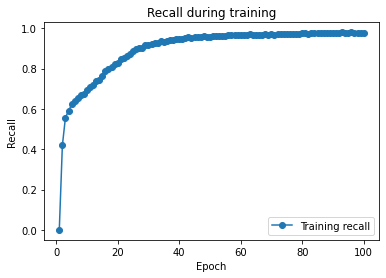

In [ ]:
t_span = range(1,len(training.history['recall_6'])+1)
# Learning process
plt.figure()
plt.plot(t_span,np.array(training.history['recall_6']), marker = 'o',label = 'Training recall')
#plt.plot(t_span,np.array(training.history['val_recall_6']),marker='o', label = 'Validation recall')
plt.title("Recall during training")
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Recall')

In [ ]:
model.save('cnn.h5')

## Evaluación

In [ ]:
qx, qy = 141, 141
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)

### Escenario 1

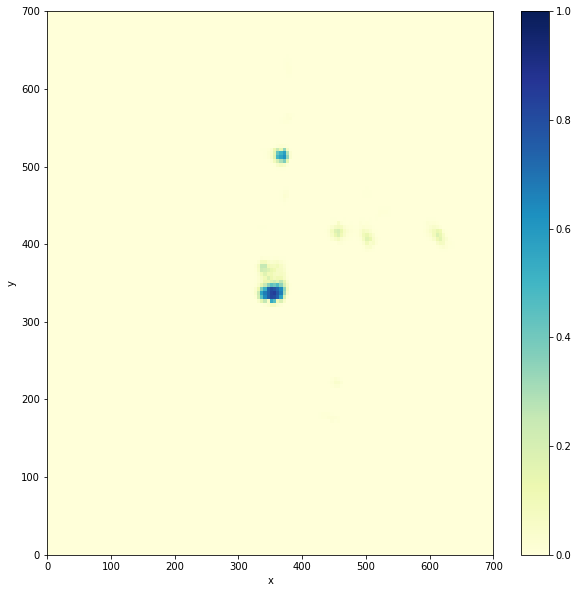

In [ ]:
mine_pred = model.predict(X_1)
mine_pred = np.reshape(mine_pred, (qx, qy))
plot_mine_map(x, y, mine_pred)

### Escenario 2

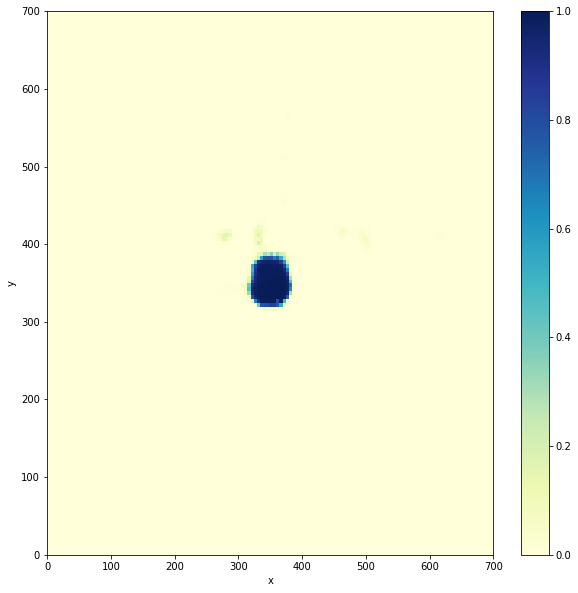

In [ ]:
mine_pred = model.predict(X_2)
mine_pred = np.reshape(mine_pred, (qx, qy))
plot_mine_map(x, y, mine_pred)

### Escenario 3

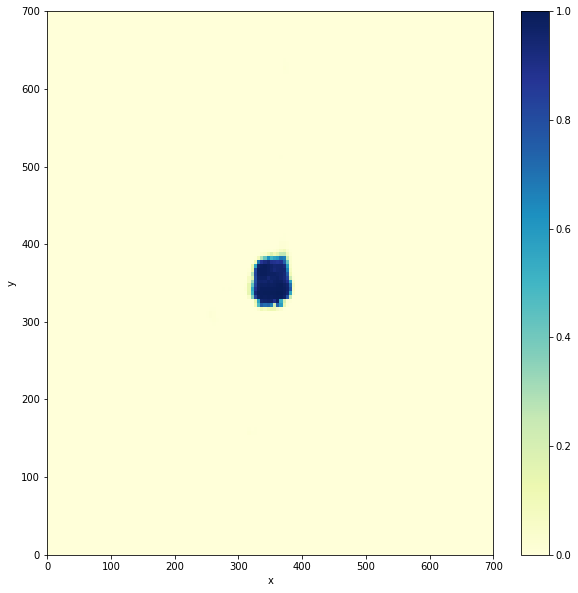

In [ ]:
mine_pred = model.predict(X_3)
mine_pred = np.reshape(mine_pred, (qx, qy))
plot_mine_map(x, y, mine_pred)

### Escenario 4

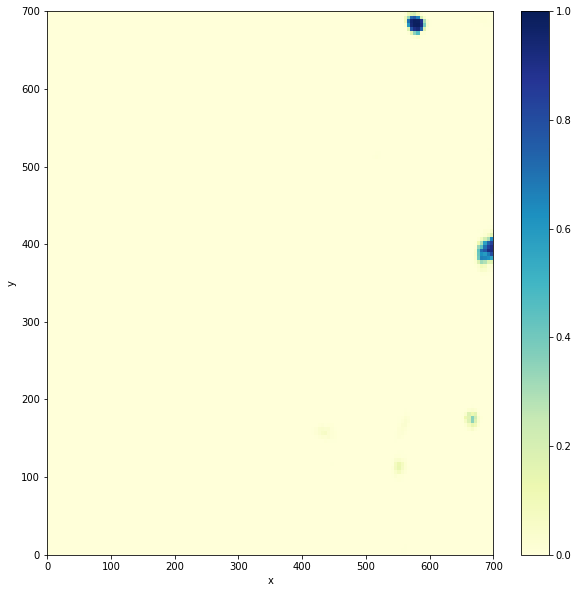

In [ ]:
mine_pred = model.predict(X_4)
mine_pred = np.reshape(mine_pred, (qx, qy))
plot_mine_map(x, y, mine_pred)

### Escenario 5

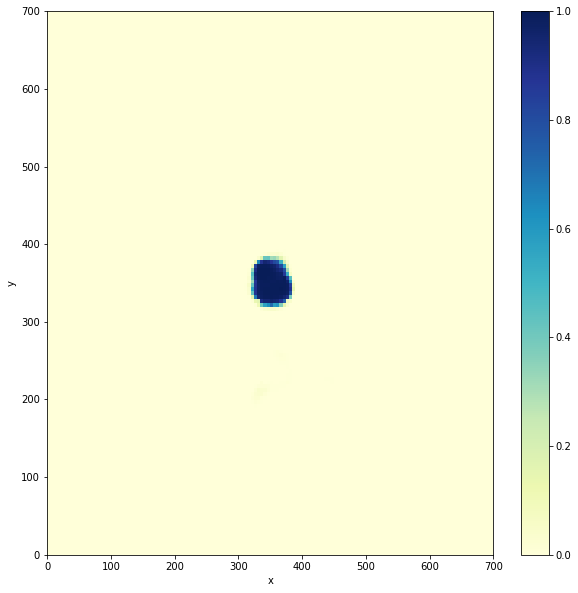

In [ ]:
mine_pred = model.predict(X_5)
mine_pred = np.reshape(mine_pred, (qx, qy))
plot_mine_map(x, y, mine_pred)

### Escenario 6

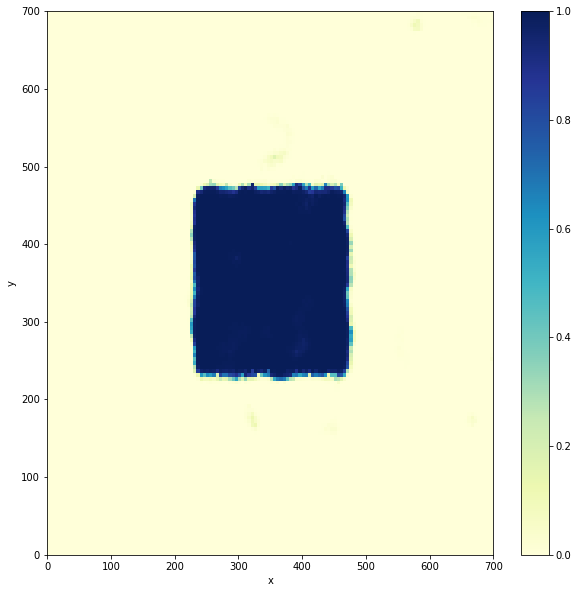

In [ ]:
mine_pred = model.predict(X_6)
mine_pred = np.reshape(mine_pred, (qx, qy))
plot_mine_map(x, y, mine_pred)

### Escenario 7

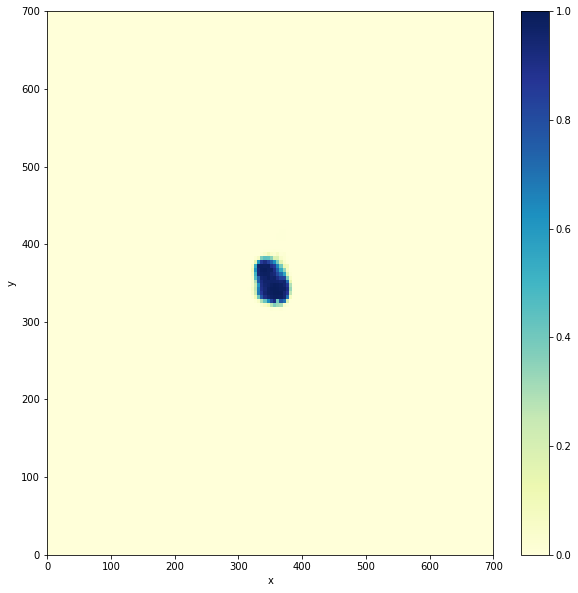

In [ ]:
mine_pred = model.predict(X_7)
mine_pred = np.reshape(mine_pred, (qx, qy))
plot_mine_map(x, y, mine_pred)

### Escenario 8

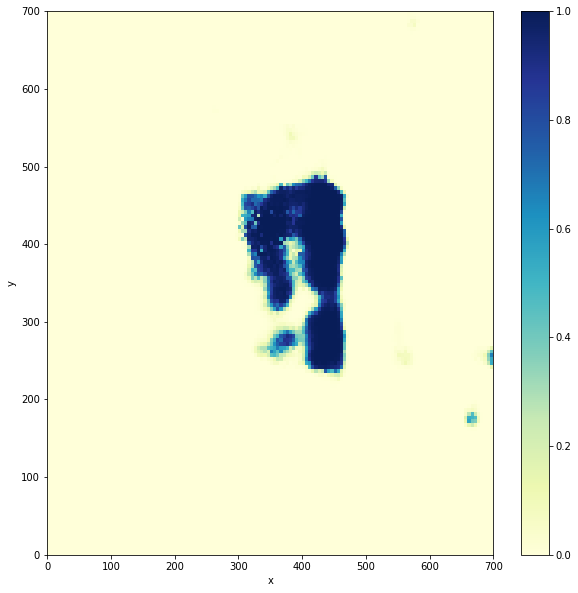

In [ ]:
mine_pred = model.predict(X_8)
mine_pred = np.reshape(mine_pred, (qx, qy))
plot_mine_map(x, y, mine_pred)

## Evaluación Nuevos

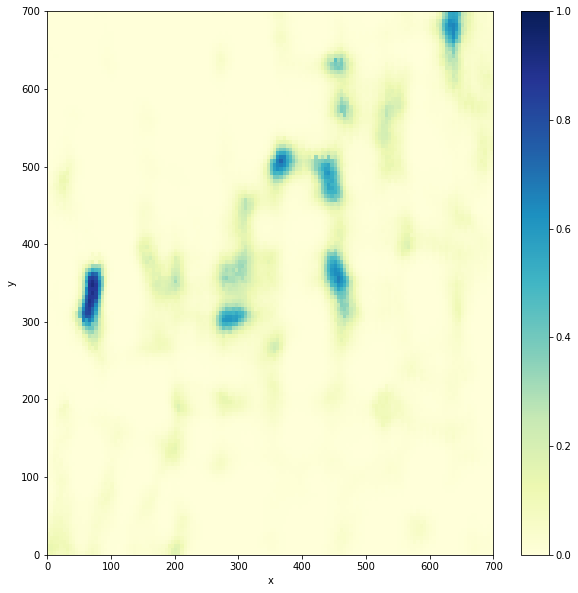

In [ ]:
mine_pred = model.predict(X_0_new)
mine_pred = np.reshape(mine_pred, (qx, qy))
plot_mine_map(x, y, mine_pred)

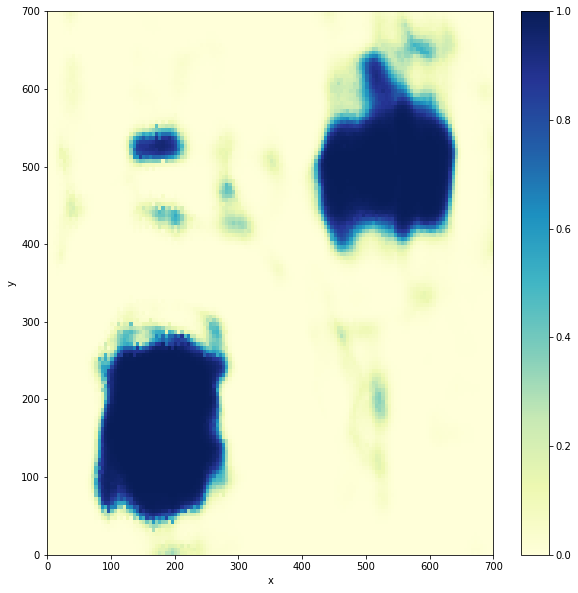

In [ ]:
mine_pred = model.predict(X_1_new)
mine_pred = np.reshape(mine_pred, (qx, qy))
plot_mine_map(x, y, mine_pred)

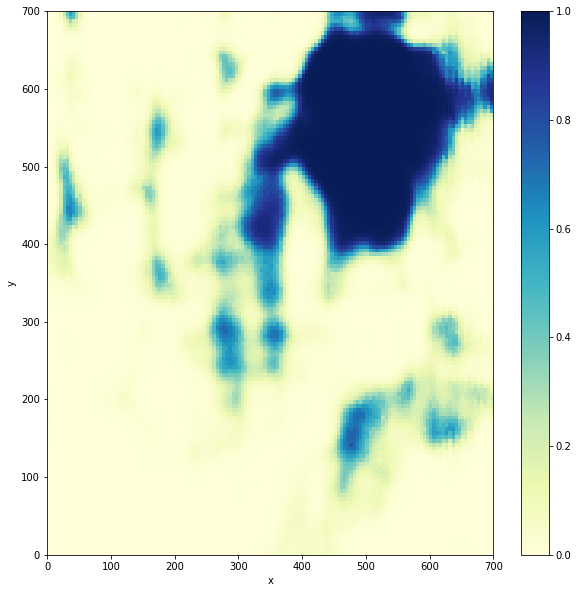

In [ ]:
mine_pred = model.predict(X_2_new)
mine_pred = np.reshape(mine_pred, (qx, qy))
plot_mine_map(x, y, mine_pred)

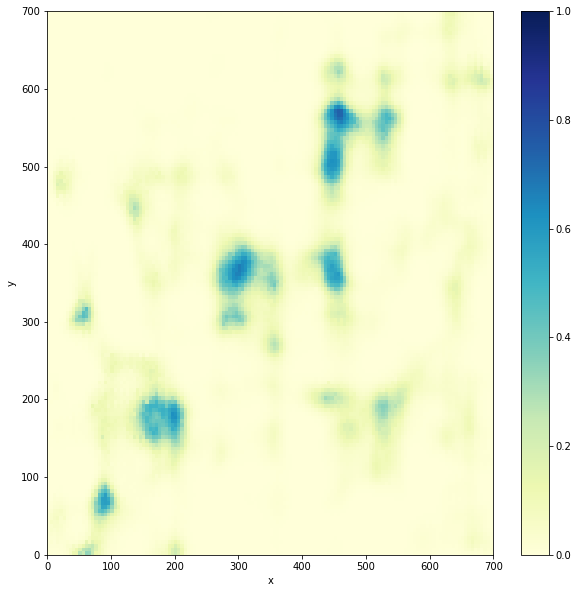

In [ ]:
mine_pred = model.predict(X_3_new)
mine_pred = np.reshape(mine_pred, (qx, qy))
plot_mine_map(x, y, mine_pred)

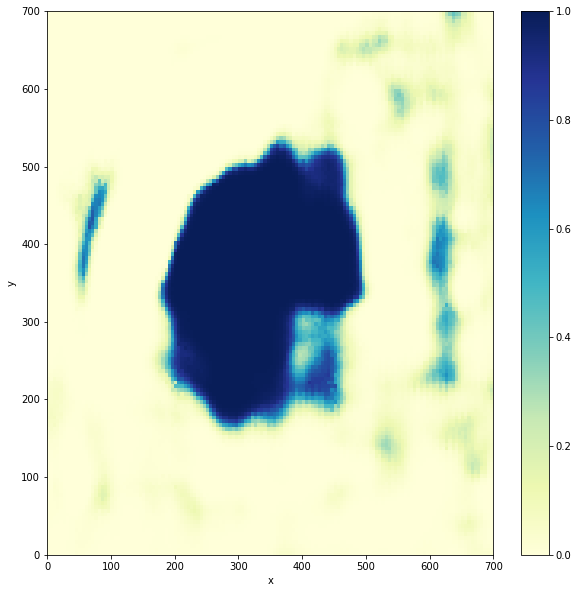

In [ ]:
mine_pred = model.predict(X_4_new)
mine_pred = np.reshape(mine_pred, (qx, qy))
plot_mine_map(x, y, mine_pred)

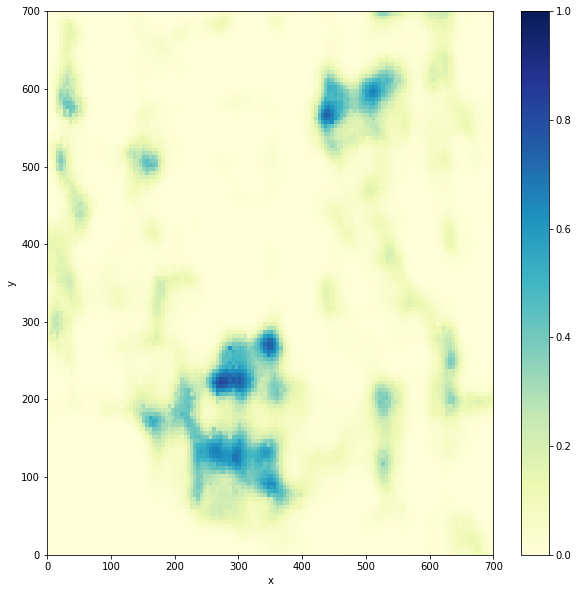

In [ ]:
mine_pred = model.predict(X_5_new)
mine_pred = np.reshape(mine_pred, (qx, qy))
plot_mine_map(x, y, mine_pred)